In [1]:
# importing required libraries
import os
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import sys
from google.colab import drive
# This mouunts google drive to the current runtime
drive.mount('/content/mnt')

Mounted at /content/mnt


In [3]:
#read loan.csv file
df = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/loan.csv')

In [4]:
#checking rows and column
df.shape

(577682, 19)

In [5]:
#dataframe column type
df.dtypes

loanId                               object
anon_ssn                             object
payFrequency                         object
apr                                 float64
applicationDate                      object
originated                             bool
originatedDate                       object
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
dtype: object

In [6]:
#check first 10 rows
df.head(10)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.00,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.00,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.00,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.00,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.00,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1
5,LL-I-09734486,b5541f49472fa0fce8e473306768f7fb,M,650.00,2016-06-12T19:27:47.951000,False,NaN,0.0,False,0,Withdrawn Application,300.0,738.18,IN,organic,0,NaN,574e2029e4b061d2c3a16a4c,1
6,LL-I-15006968,1828c64bb2dffeae88b27174a9f79ecc,B,680.00,2017-01-12T18:04:37.921000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1362.92,TX,lead,25,NaN,5877c533e4b08f2480ab7e5a,1
7,LL-I-08327946,02596517e7633c7e87e6b333a0fb1bbe,M,449.99,2016-04-01T22:13:02.131000,False,NaN,0.0,False,0,Withdrawn Application,350.0,759.84,UT,bvMandatory,3,NaN,NaN,0
8,LL-I-10568307,523ed92e1145eb688bb631da24695197,S,251.00,2016-07-27T00:19:52.808000,False,NaN,0.0,False,0,Withdrawn Application,2600.0,8230.01,CA,california,40,NaN,5797fe22e4b0d05020f298ce,1
9,LL-I-05518977,47bf79119075e41ef65510f2900c8e4a,B,360.00,2015-12-09T18:17:33.622000,False,NaN,0.0,False,0,Withdrawn Application,500.0,995.22,IL,bvMandatory,6,NaN,563281d2e4b07887adc5bc0a,1


In [7]:
#check last 10 rows
df.tail(10)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
577672,LL-I-06856000,cde5cae2dbf23e19b44f2fedcce1e2d3,B,360.0,2016-01-28T07:51:03.158000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1032.89,IL,bvMandatory,6,NaN,5626382ee4b003d99dbe5c1f,1
577673,LL-I-18489298,e72841440f98aee233fc82b2914df610,W,590.0,2017-03-16T14:34:50.238000,False,NaN,0.0,False,0,Withdrawn Application,1000.0,3023.13,OH,lead,25,NaN,58caa287e4b0b0437a794657,1
577674,LL-I-14793786,9cbc945e8042712d874675654fec23dd,B,490.0,2017-01-11T06:06:25.821000,False,NaN,0.0,False,0,Rejected,500.0,1274.65,MO,bvMandatory,6,NaN,5875cc98e4b08f247c4f7138,1
577675,LL-I-17012301,43ff47d188fa9350e43f18094254b4d1,W,590.0,2017-02-11T14:46:01.900000,False,NaN,0.0,False,0,Withdrawn Application,350.0,1124.87,WI,bvMandatory,3,NaN,NaN,0
577676,LL-I-07825899,3506893b63baae416cf211238a391acc,B,590.0,2016-03-14T11:30:03.660000,False,NaN,0.0,False,0,Withdrawn Application,900.0,2534.33,IN,bvMandatory,10,NaN,56463c19e4b033d9d3452639,1
577677,LL-I-12122269,801262d04720d32040612759857f4147,B,590.0,2016-11-08T17:32:33.554000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1292.41,NV,bvMandatory,3,NaN,58220cdde4b051c58d919c1f,1
577678,LL-I-16183462,e37750de9d99a67e0fa96a51e86fdf5b,S,490.0,2017-01-24T22:20:59.818000,False,NaN,0.0,False,0,Withdrawn Application,1000.0,2592.39,MO,lead,25,NaN,5887d349e4b08f249ac45e2f,1
577679,LL-I-06962710,d7e55e85266208ac4c353f42ebcde5ca,B,590.0,2016-02-02T03:05:47.797000,False,NaN,0.0,False,0,Withdrawn Application,300.0,844.75,IN,bvMandatory,6,NaN,550b1f59e4b0d4592e28c84e,1
577680,LL-I-01253468,c3b35307cb36116bf59574f9138d3dad,B,550.0,2015-05-21T20:19:49.639000,False,NaN,0.0,False,0,Withdrawn Application,300.0,770.80,OH,organic,6,NaN,NaN,0
577681,LL-I-04733921,dc0a43b16c037ee5d0142daebb5db83a,I,590.0,2015-11-17T22:04:20.862000,False,NaN,0.0,False,0,Rejected,400.0,1214.63,OH,bvMandatory,6,NaN,564f801ae4b05a02bef951e8,1


In [8]:
#check columns
df.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF'],
      dtype='object')

In [9]:
# select numeric columns
df_num = df.select_dtypes(include=[np.number])
num_col = df_num.columns.values
print(num_col)

['apr' 'nPaidOff' 'isFunded' 'loanAmount'
 'originallyScheduledPaymentAmount' 'leadCost' 'hasCF']


In [10]:
# look at summary of numerical fields
df.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF
count,573760.000000,577658.000000,577682.000000,575432.000000,577682.000000,577682.000000,577682.000000
mean,553.080972,0.037887,0.067480,514.245084,1428.897209,7.854389,0.619187
std,110.046159,0.333366,0.250852,320.939929,925.009141,12.853451,0.485587
min,0.000000,0.000000,0.000000,0.000000,-816.710000,0.000000,0.000000
25%,490.000000,0.000000,0.000000,350.000000,1023.640000,3.000000,0.000000
50%,590.000000,0.000000,0.000000,500.000000,1245.250000,3.000000,1.000000
75%,601.000000,0.000000,0.000000,500.000000,1615.660000,6.000000,1.000000
max,705.590000,21.000000,1.000000,5000.000000,19963.630000,200.000000,1.000000


In [11]:
# select non numeric columns
df_non_num = df.select_dtypes(exclude=[np.number])
non_num_col = df_non_num.columns.values
print(non_num_col)

['loanId' 'anon_ssn' 'payFrequency' 'applicationDate' 'originated'
 'originatedDate' 'approved' 'loanStatus' 'state' 'leadType' 'fpStatus'
 'clarityFraudId']


In [12]:
# look at summary of non-numerical fields
df.describe(exclude='number')

,loanId,anon_ssn,payFrequency,applicationDate,originated,originatedDate,approved,loanStatus,state,leadType,fpStatus,clarityFraudId
count,577426,577682,576409,577682,577682,46044,577682,577291,577550,577682,51723,357693
unique,577426,459393,5,577624,2,46042,2,21,44,10,8,314915
top,LL-I-07399092,c8bb49de1f8ff99d2ecddfb7037dc66e,B,2017-01-03T18:05:40.811000,False,2017-03-06T22:29:45.066000,False,Withdrawn Application,OH,bvMandatory,Checked,561e95f7e4b0efa8a6cdc975
freq,1,35,316654,3,531676,2,537646,450984,90496,475001,32978,15


In [13]:
#non null elements
df.count()

loanId                              577426
anon_ssn                            577682
payFrequency                        576409
apr                                 573760
applicationDate                     577682
originated                          577682
originatedDate                       46044
nPaidOff                            577658
approved                            577682
isFunded                            577682
loanStatus                          577291
loanAmount                          575432
originallyScheduledPaymentAmount    577682
state                               577550
leadType                            577682
leadCost                            577682
fpStatus                             51723
clarityFraudId                      357693
hasCF                               577682
dtype: int64

In [14]:
#number of unique elements
df.nunique()

loanId                              577426
anon_ssn                            459393
payFrequency                             5
apr                                    130
applicationDate                     577624
originated                               2
originatedDate                       46042
nPaidOff                                22
approved                                 2
isFunded                                 2
loanStatus                              21
loanAmount                             564
originallyScheduledPaymentAmount     80784
state                                   44
leadType                                10
leadCost                                15
fpStatus                                 8
clarityFraudId                      314915
hasCF                                    2
dtype: int64

In [15]:
#null elements
df.isna().sum()

loanId                                 256
anon_ssn                                 0
payFrequency                          1273
apr                                   3922
applicationDate                          0
originated                               0
originatedDate                      531638
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                            525959
clarityFraudId                      219989
hasCF                                    0
dtype: int64

In [16]:
#filter NaN elements for loanId
df[df['loanId'].isna()]

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
1668,NaN,8f53d4e3d17fb490a16468f940992475,B,NaN,2015-06-23T13:29:21.667000,False,NaN,0.0,False,0,NaN,NaN,0.0,TX,bvMandatory,3,No Payments,NaN,0
4749,NaN,ca89dd7de41d72d531311479cd9d166d,B,NaN,2016-01-07T06:04:47.937000,False,NaN,0.0,False,0,NaN,NaN,0.0,OH,bvMandatory,6,No Schedule,NaN,0
5970,NaN,5d5adaa9cabb297235b0223c6e7182fc,B,NaN,2016-01-07T06:14:41.987000,False,NaN,0.0,False,0,NaN,NaN,0.0,IL,bvMandatory,3,No Schedule,568e01e0e4b040f8ae2d2694,1
16229,NaN,8e44524a86abe0db1f5c0f6afc9bbd7c,B,NaN,2016-06-15T03:15:05.401000,False,NaN,0.0,False,0,NaN,NaN,0.0,MI,bvMandatory,3,No Payments,5760c831e4b09f30d601f321,1
20193,NaN,213ad4d617b56bee5483f79837bcb6e6,B,NaN,2016-12-22T06:59:56.378000,False,NaN,0.0,False,0,NaN,NaN,0.0,AZ,lead,10,No Payments,585b79e7e4b08f24665c2b46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560056,NaN,af137379ffc63ac88dabe54f82a28343,M,NaN,2015-05-12T20:21:55.552000,False,NaN,0.0,False,0,NaN,NaN,0.0,OH,bvMandatory,3,No Payments,NaN,0
564530,NaN,d115b3e074a3f9d2a8eadb36ab2529d7,B,NaN,2015-12-17T17:28:08.011000,False,NaN,0.0,False,0,NaN,NaN,0.0,MI,lead,40,No Schedule,5672f0a1e4b08b757bd1cd20,1
564540,NaN,026abdf09af1e5a89175755e0ffa29d8,B,NaN,2016-04-14T19:28:57.076000,False,NaN,0.0,False,0,NaN,NaN,0.0,TN,bvMandatory,10,No Schedule,NaN,0
566384,NaN,7cc6cc1697c748f1196e210afb4fb683,W,NaN,2016-01-07T06:18:06.065000,False,NaN,0.0,False,0,NaN,NaN,0.0,OH,bvMandatory,3,No Schedule,NaN,0


In [17]:
#drop hasCF column, 1 means column
df.drop('hasCF', axis=1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ee78b7fd0>,
      dtype=object)

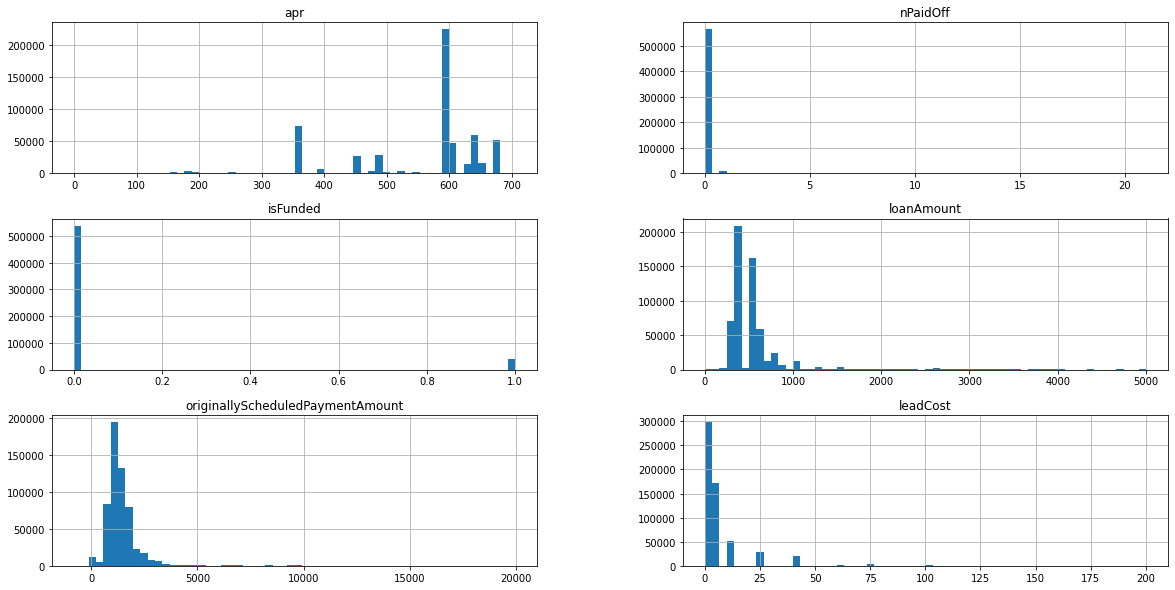

In [18]:
#plot of histogram for the dataframe
df.hist(bins = 60, figsize = (20,10))

In [19]:
#filter payFrequency
df['payFrequency'].value_counts()

B    316654
W    137188
M     59092
I     33787
S     29688
Name: payFrequency, dtype: int64

In [20]:
#filter loan that has been originated
df['originated'].value_counts()

False    531676
True      46006
Name: originated, dtype: int64

In [21]:
#filter counts of client with number of loans has paid off in the past
df['nPaidOff'].value_counts()

0.0     564599
1.0       8596
2.0       2602
3.0        918
4.0        427
5.0        212
6.0        133
7.0         56
8.0         26
11.0        16
9.0         15
13.0        10
10.0         9
12.0         8
14.0         8
19.0         7
18.0         6
20.0         5
17.0         2
15.0         1
21.0         1
16.0         1
Name: nPaidOff, dtype: int64

In [22]:
#filter number of loans approved
df['approved'].value_counts()

False    537646
True      40036
Name: approved, dtype: int64

In [23]:
#filter number of loans funded
df['isFunded'].value_counts()

0    538700
1     38982
Name: isFunded, dtype: int64

In [24]:
#filter loan status
df['loanStatus'].value_counts()

Withdrawn Application          450984
Rejected                        85070
Paid Off Loan                   11427
External Collection             11334
New Loan                         8112
Internal Collection              5567
Returned Item                    1182
CSR Voided New Loan              1026
Settlement Paid Off               708
Credit Return Void                704
Customer Voided New Loan          504
Settled Bankruptcy                326
Pending Paid Off                  169
Charged Off Paid Off              160
Pending Application Fee             5
Pending Rescind                     4
Pending Application                 4
Voided New Loan                     2
Charged Off                         1
Customver Voided New Loan           1
Settlement Pending Paid Off         1
Name: loanStatus, dtype: int64

In [25]:
#filter loan status
df['leadType'].value_counts()

bvMandatory      475001
lead              72673
organic           22851
prescreen          4515
rc_returning       2069
california          479
lionpay              26
repeat               24
instant-offer        22
express              22
Name: leadType, dtype: int64

In [26]:
#filter loan status
df['fpStatus'].value_counts()

Checked        32978
No Payments    11427
Rejected        5522
No Schedule     1323
Cancelled        249
Skipped          218
Pending            5
Returned           1
Name: fpStatus, dtype: int64

<Figure size 6000x1500 with 0 Axes>

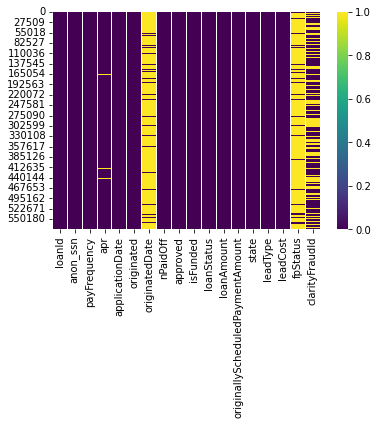

<Figure size 6000x1500 with 0 Axes>

In [27]:
#identify null elements
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.figure(figsize=(12, 3), dpi = 500)

In [28]:
#check missing values
for col in df.columns:
    missing_percent = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_percent*100)))

loanId - 0%
anon_ssn - 0%
payFrequency - 0%
apr - 1%
applicationDate - 0%
originated - 0%
originatedDate - 92%
nPaidOff - 0%
approved - 0%
isFunded - 0%
loanStatus - 0%
loanAmount - 0%
originallyScheduledPaymentAmount - 0%
state - 0%
leadType - 0%
leadCost - 0%
fpStatus - 91%
clarityFraudId - 38%


In [29]:
#read payment.csv file
py = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/payment.csv')

In [30]:
#checking rows and column
py.shape

(689364, 9)

In [31]:
py.head(10)

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN
5,LL-I-00000021,6,False,2015-02-27T05:00:00,51.97,117.64,169.61,Checked,NaN
6,LL-I-00000021,7,False,2015-03-13T04:00:00,61.54,108.07,169.61,Checked,NaN
7,LL-I-00000021,8,False,2015-03-27T04:00:00,72.87,96.74,169.61,Checked,NaN
8,LL-I-00000021,9,False,2015-04-10T04:00:00,86.29,83.32,169.61,Checked,NaN
9,LL-I-00000021,10,False,2015-04-24T04:00:00,102.17,67.44,169.61,Rejected,R01


In [32]:
# look at summary of numerical fields
py.describe()

,installmentIndex,principal,fees,paymentAmount
count,689364.000000,689364.000000,689364.000000,689364.000000
mean,10.553222,45.557543,67.003994,112.680232
std,8.049530,81.724683,59.789510,105.783710
min,1.000000,-303.370000,-42.560000,-337.700000
25%,5.000000,13.180000,28.820000,56.810000
50%,9.000000,27.610000,51.300000,86.340000
75%,14.000000,53.380000,86.440000,135.090000
max,105.000000,4000.000000,1257.710000,4063.600000


In [33]:
# look at summary of non-numerical fields
py.describe(exclude='number')

,loanId,isCollection,paymentDate,paymentStatus,paymentReturnCode
count,689364,689364,689364,689364,31533
unique,39952,2,18436,9,31
top,LL-I-12230332,False,2017-03-31T04:00:00,Cancelled,R01
freq,105,675469,10236,270334,22866


In [34]:
#non null elements
py.count()

loanId               689364
installmentIndex     689364
isCollection         689364
paymentDate          689364
principal            689364
fees                 689364
paymentAmount        689364
paymentStatus        689364
paymentReturnCode     31533
dtype: int64

In [35]:
#number of unique elements
py.nunique()

loanId               39952
installmentIndex       105
isCollection             2
paymentDate          18436
principal            26886
fees                 29779
paymentAmount        27013
paymentStatus            9
paymentReturnCode       31
dtype: int64

In [36]:
#null elements
py.isna().sum()

loanId                    0
installmentIndex          0
isCollection              0
paymentDate               0
principal                 0
fees                      0
paymentAmount             0
paymentStatus             0
paymentReturnCode    657831
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ee3f9d950>,
      dtype=object)

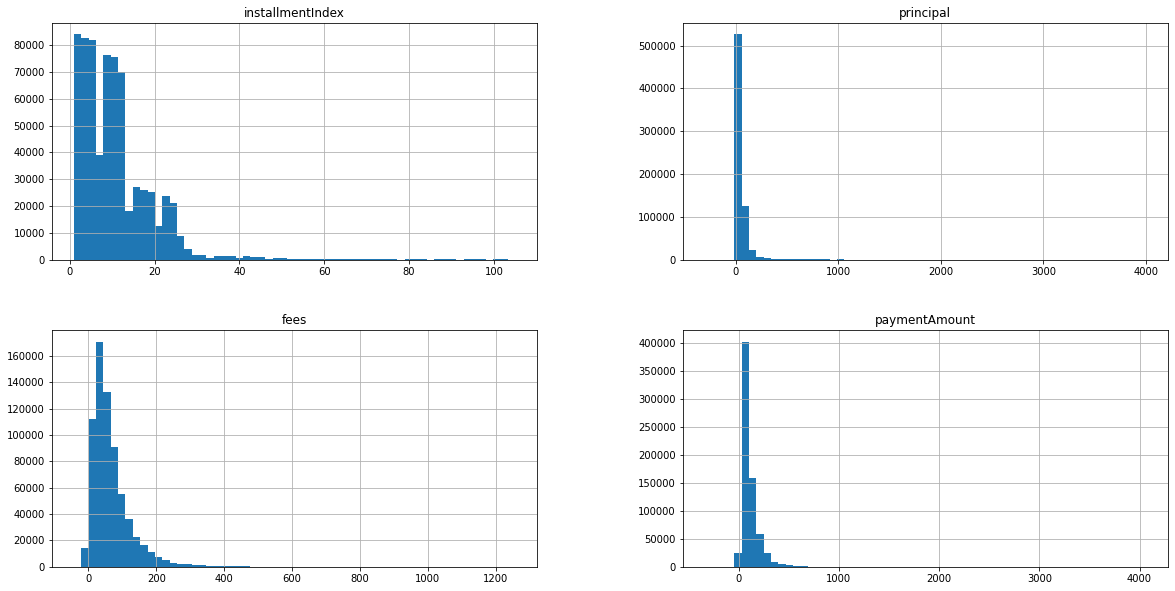

In [37]:
#plot histogram for numeric data
py.hist(bins = 60, figsize = (20,10))

In [38]:
#count the occurrence of each unique elements
py['isCollection'].value_counts()

False    675469
True      13895
Name: isCollection, dtype: int64

In [39]:
#count the occurrence of each unique elements
py['installmentIndex'].value_counts()

1      42386
2      41640
3      41414
4      41247
5      41115
       ...  
100       12
99        12
98        12
96        12
105        4
Name: installmentIndex, Length: 105, dtype: int64

In [40]:
#count the occurrence of each unique elements
py['paymentStatus'].value_counts()

Cancelled                  270334
Checked                    209621
None                       164057
Rejected                    32330
Pending                      9241
Skipped                      3761
Rejected Awaiting Retry        18
Returned                        1
Complete                        1
Name: paymentStatus, dtype: int64

In [41]:
#count the occurrence of each unique elements
py['paymentReturnCode'].value_counts()

R01       22866
R02        2761
R08        2259
R16        1085
R10         620
MISSED      537
R03         318
RXS         226
R09         176
R07         160
C05         106
C01          87
R20          83
R99          60
RAF          58
R04          39
C03          34
C02          10
RWC           7
LPP01         7
R06           6
RUP           6
RBW           5
R29           4
RFG           3
R15           3
R13           2
C07           2
RIR           1
R19           1
RXL           1
Name: paymentReturnCode, dtype: int64

In [42]:
#read clarity_underwriting_variables.csv file
uw = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/clarity_underwriting_variables.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
uw.shape

(49752, 54)

In [44]:
uw.head(10)

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45
5,11.0,6.0,6.0,6.0,21.0,6.0,6.0,6.0,21.0,True,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,564.0,54cc38e1e4b0ba763e44dad0
6,6.0,3.0,3.0,3.0,8.0,5.0,3.0,5.0,18.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,785.0,54cce897e4b0ba763e46c138
7,5.0,5.0,2.0,3.0,5.0,5.0,2.0,5.0,8.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,691.0,54cd2174e4b0ba763e4b1909
8,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,43.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,726.0,54cd4169e4b0ba763e4cfc18
9,5.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,20.0,True,...,(M) Mobile Phone,partial,NaN,NaN,S03,NaN,match,26.0,675.0,54cd46f3e4b0ba763e4d22b5


In [45]:
# look at summary of numerical fields
uw.describe()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore
count,49750.000000,49750.000000,49750.000000,49750.000000,49750.000000,49750.000000,49750.000000,49750.000000,49750.000000,49735.000000,49735.000000,49720.000000,49615.000000
mean,7.313628,4.601990,2.343980,4.006874,10.554513,5.423799,3.292121,6.155578,20.302291,2.118327,7.202554,11.728842,683.769787
std,6.327122,3.302288,1.436345,2.697831,10.450845,4.110483,2.109667,4.952620,23.771239,1.254602,79.908530,14.116701,126.205372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,122.000000
25%,3.000000,3.000000,1.000000,3.000000,4.000000,3.000000,2.000000,3.000000,6.000000,1.000000,1.000000,1.000000,592.000000
50%,5.000000,3.000000,3.000000,3.000000,7.000000,4.000000,3.000000,5.000000,12.000000,2.000000,1.000000,11.000000,691.000000
75%,9.000000,5.000000,3.000000,5.000000,13.000000,6.000000,4.000000,7.000000,25.000000,3.000000,2.000000,15.000000,783.000000
max,89.000000,60.000000,16.000000,42.000000,202.000000,64.000000,35.000000,83.000000,438.000000,8.000000,4056.000000,125.000000,965.000000


In [46]:
# look at summary of non-numerical fields
uw.describe(exclude='number')

,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate,.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential,.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk,.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother,.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days,.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid,.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncodedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,underwritingid
count,49712,49712,49712,49712,49712,49712,49712,49712,49712,49712,...,49712,5627,48799,49720,1515,9029,2669,5627,49720,49752
unique,2,2,2,2,2,2,2,2,1,2,...,5,1,8,4,3,6,2,1,5,49752
top,False,True,False,False,False,False,False,False,False,False,...,unavailable,(A8) Match to Last Name only,(M) Mobile Phone,partial,R,D07,S03,A8,match,54cbffcee4b0ba763e43144d
freq,37474,45781,49569,49706,42437,49193,49141,48395,49712,49637,...,47510,5627,45846,35087,1428,4438,2374,5627,39737,1


In [47]:
#non null elements
uw.count()

.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                    49750
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                               49750
.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                     49750
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                       49750
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                    49750
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago                                     49750
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago                                    49750
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago                                   49750
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago                            49750
.underwritingdatacl

In [48]:
#null elements
uw.isna().sum()

.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                                   2
.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                         2
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                           2
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago                                         2
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago                                       2
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago                                2
.underwritingdatacl

In [49]:
#rename columns to shorter form
uw.rename(columns = {'.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators':'totalnumberoffraudindicators', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult':'overallmatchresult'}, inplace = True)

In [50]:
#create a dataframe with the needed columns
uw_sub = uw[['totalnumberoffraudindicators','overallmatchresult','clearfraudscore','underwritingid']]

In [51]:
uw_sub

,totalnumberoffraudindicators,overallmatchresult,clearfraudscore,underwritingid
0,2.0,partial,871.0,54cbffcee4b0ba763e43144d
1,3.0,partial,397.0,54cc0408e4b0418d9a7f78af
2,3.0,match,572.0,54cc0683e4b0418d9a80adb6
3,1.0,partial,838.0,54cc0780e4b0ba763e43b74a
4,1.0,match,768.0,54cc1d67e4b0ba763e445b45
...,...,...,...,...
49747,1.0,partial,677.0,58cc5706e4b0b0437e26b19c
49748,1.0,partial,640.0,58cc5763e4b0b0437e272d38
49749,3.0,match,576.0,58cc57d4e4b0b0437e278bff
49750,3.0,match,830.0,58cc5916e4b0b0437e2b6e07


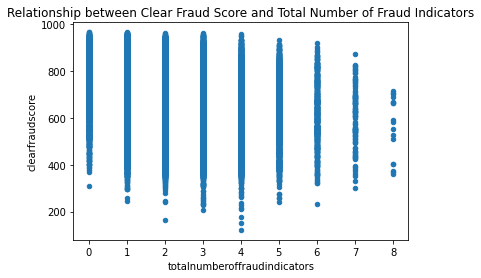

In [52]:
#plot the scatter plot
uw_sub[['totalnumberoffraudindicators','clearfraudscore']].plot(title = 'Relationship between Clear Fraud Score and Total Number of Fraud Indicators' ,kind = 'scatter', x = 'totalnumberoffraudindicators', y = 'clearfraudscore')